In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) 
from sklearn.pipeline import Pipeline
 # streaming pipelines
from sklearn.base import BaseEstimator, TransformerMixin 
# To create a box-cox transformation class
from collections import Counter

In [2]:
tf_df = pd.read_csv(r"C:\Users\SONY\Downloads\temperature.csv")
tf_df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
tf_df.shape

(7752, 25)

In [4]:
tf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
tf_df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

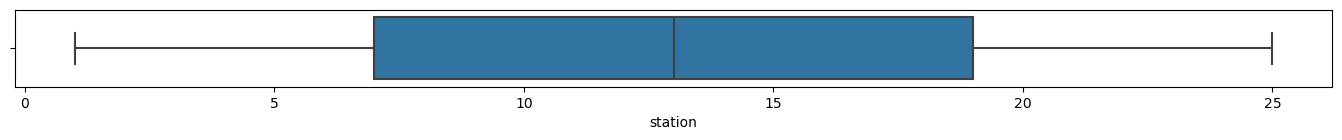

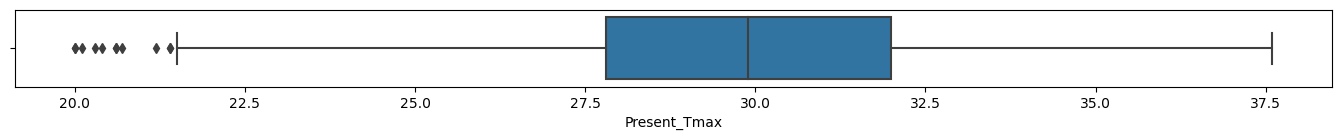

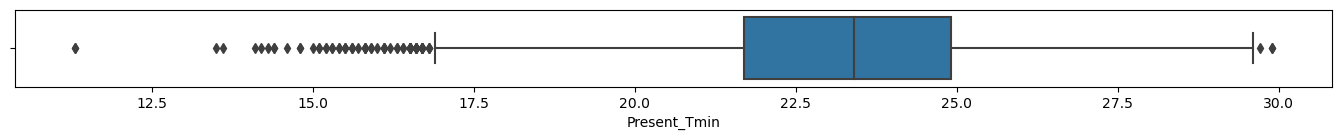

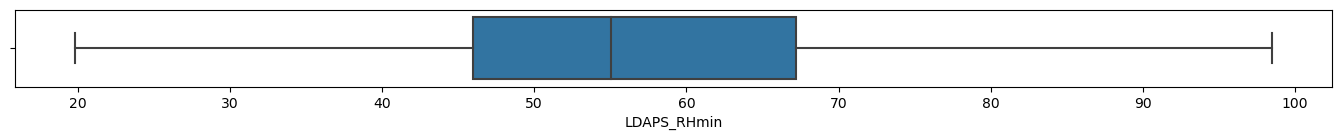

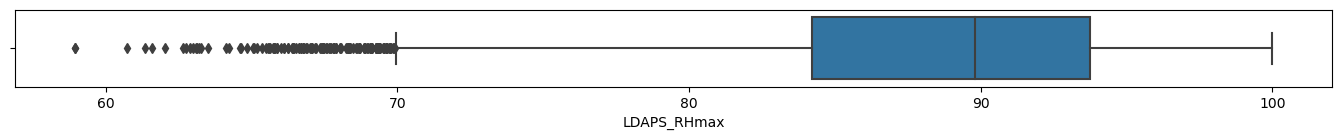

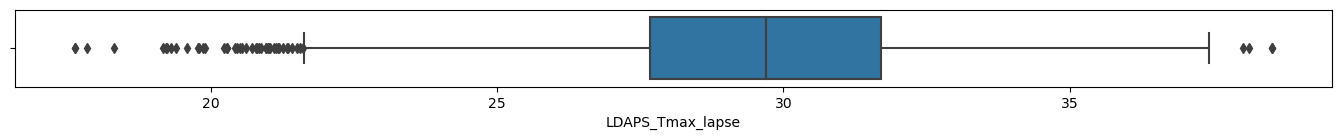

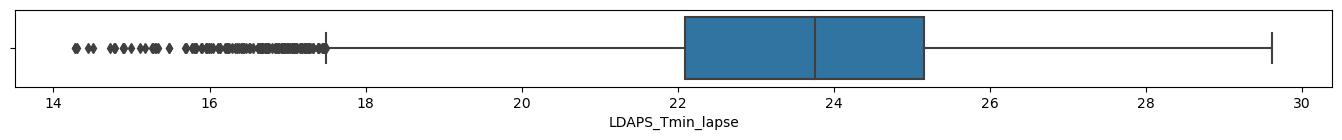

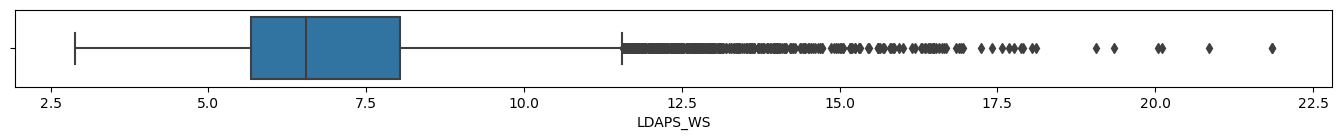

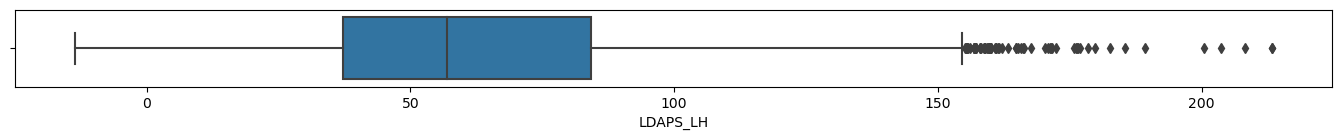

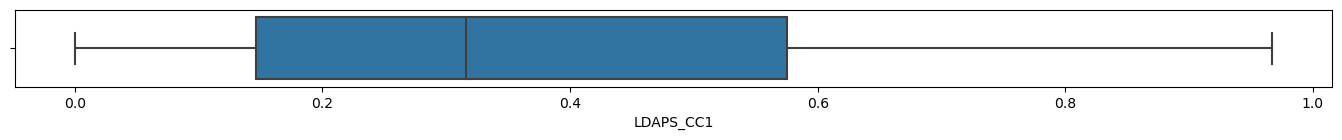

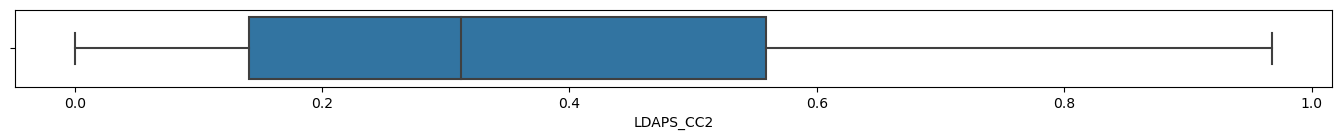

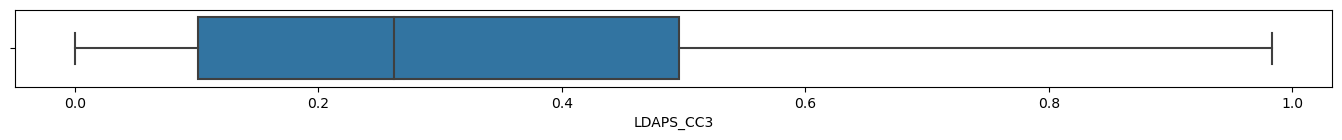

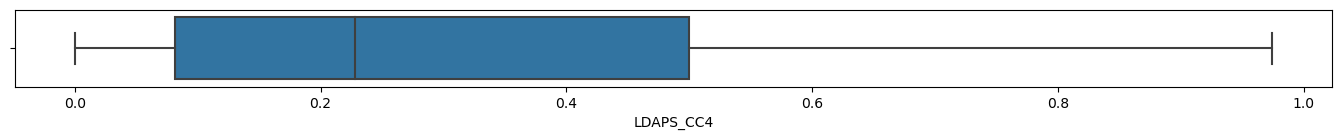

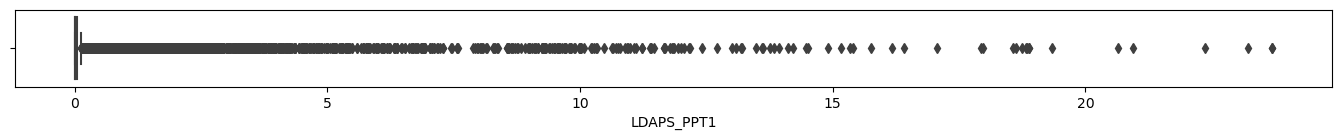

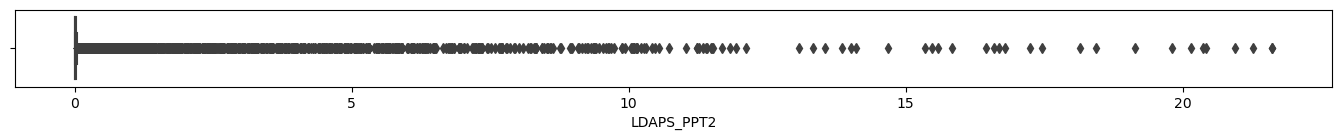

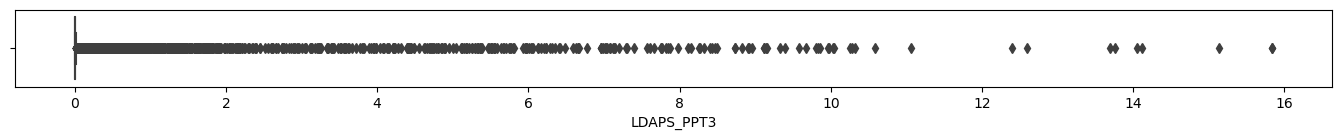

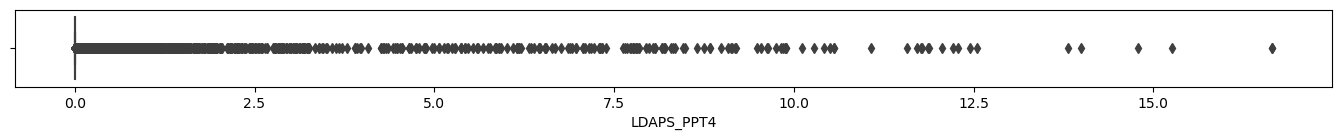

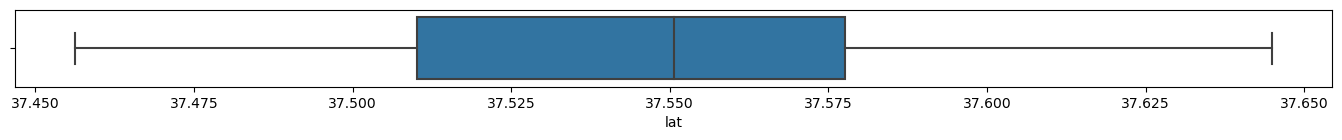

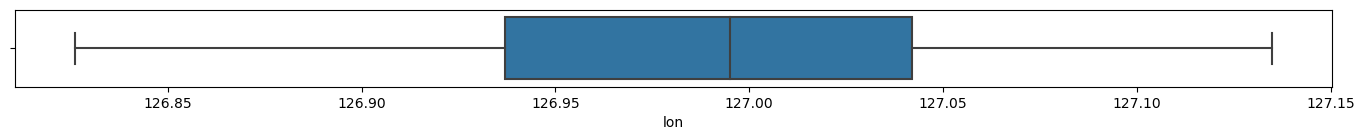

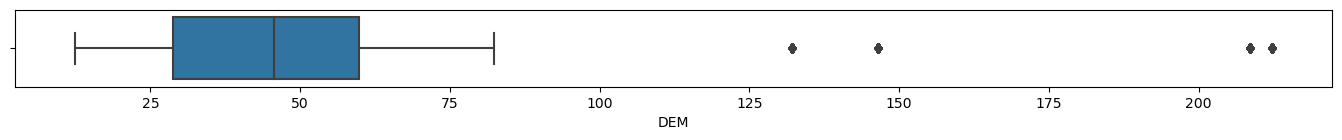

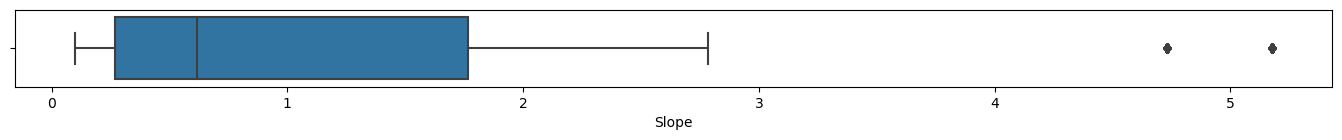

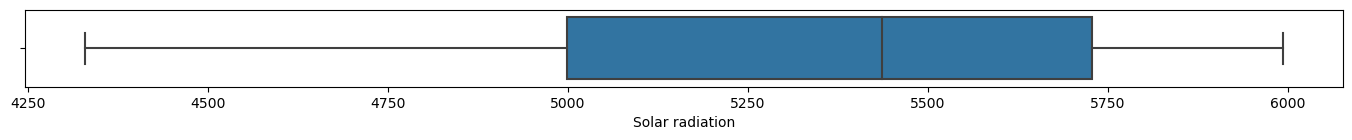

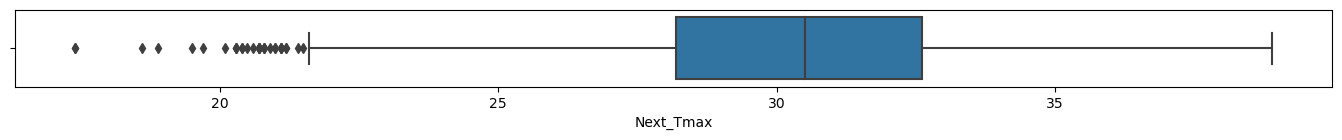

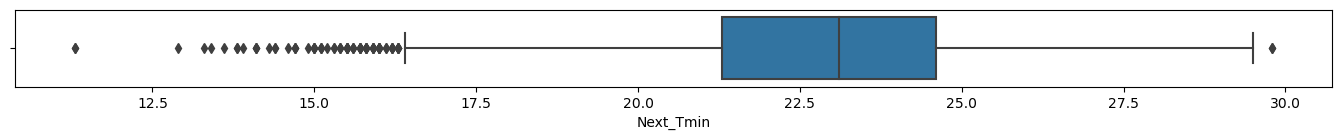

In [6]:
tf_df= tf_df.select_dtypes(exclude=['object'])
for column in tf_df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=tf_df, x=column)

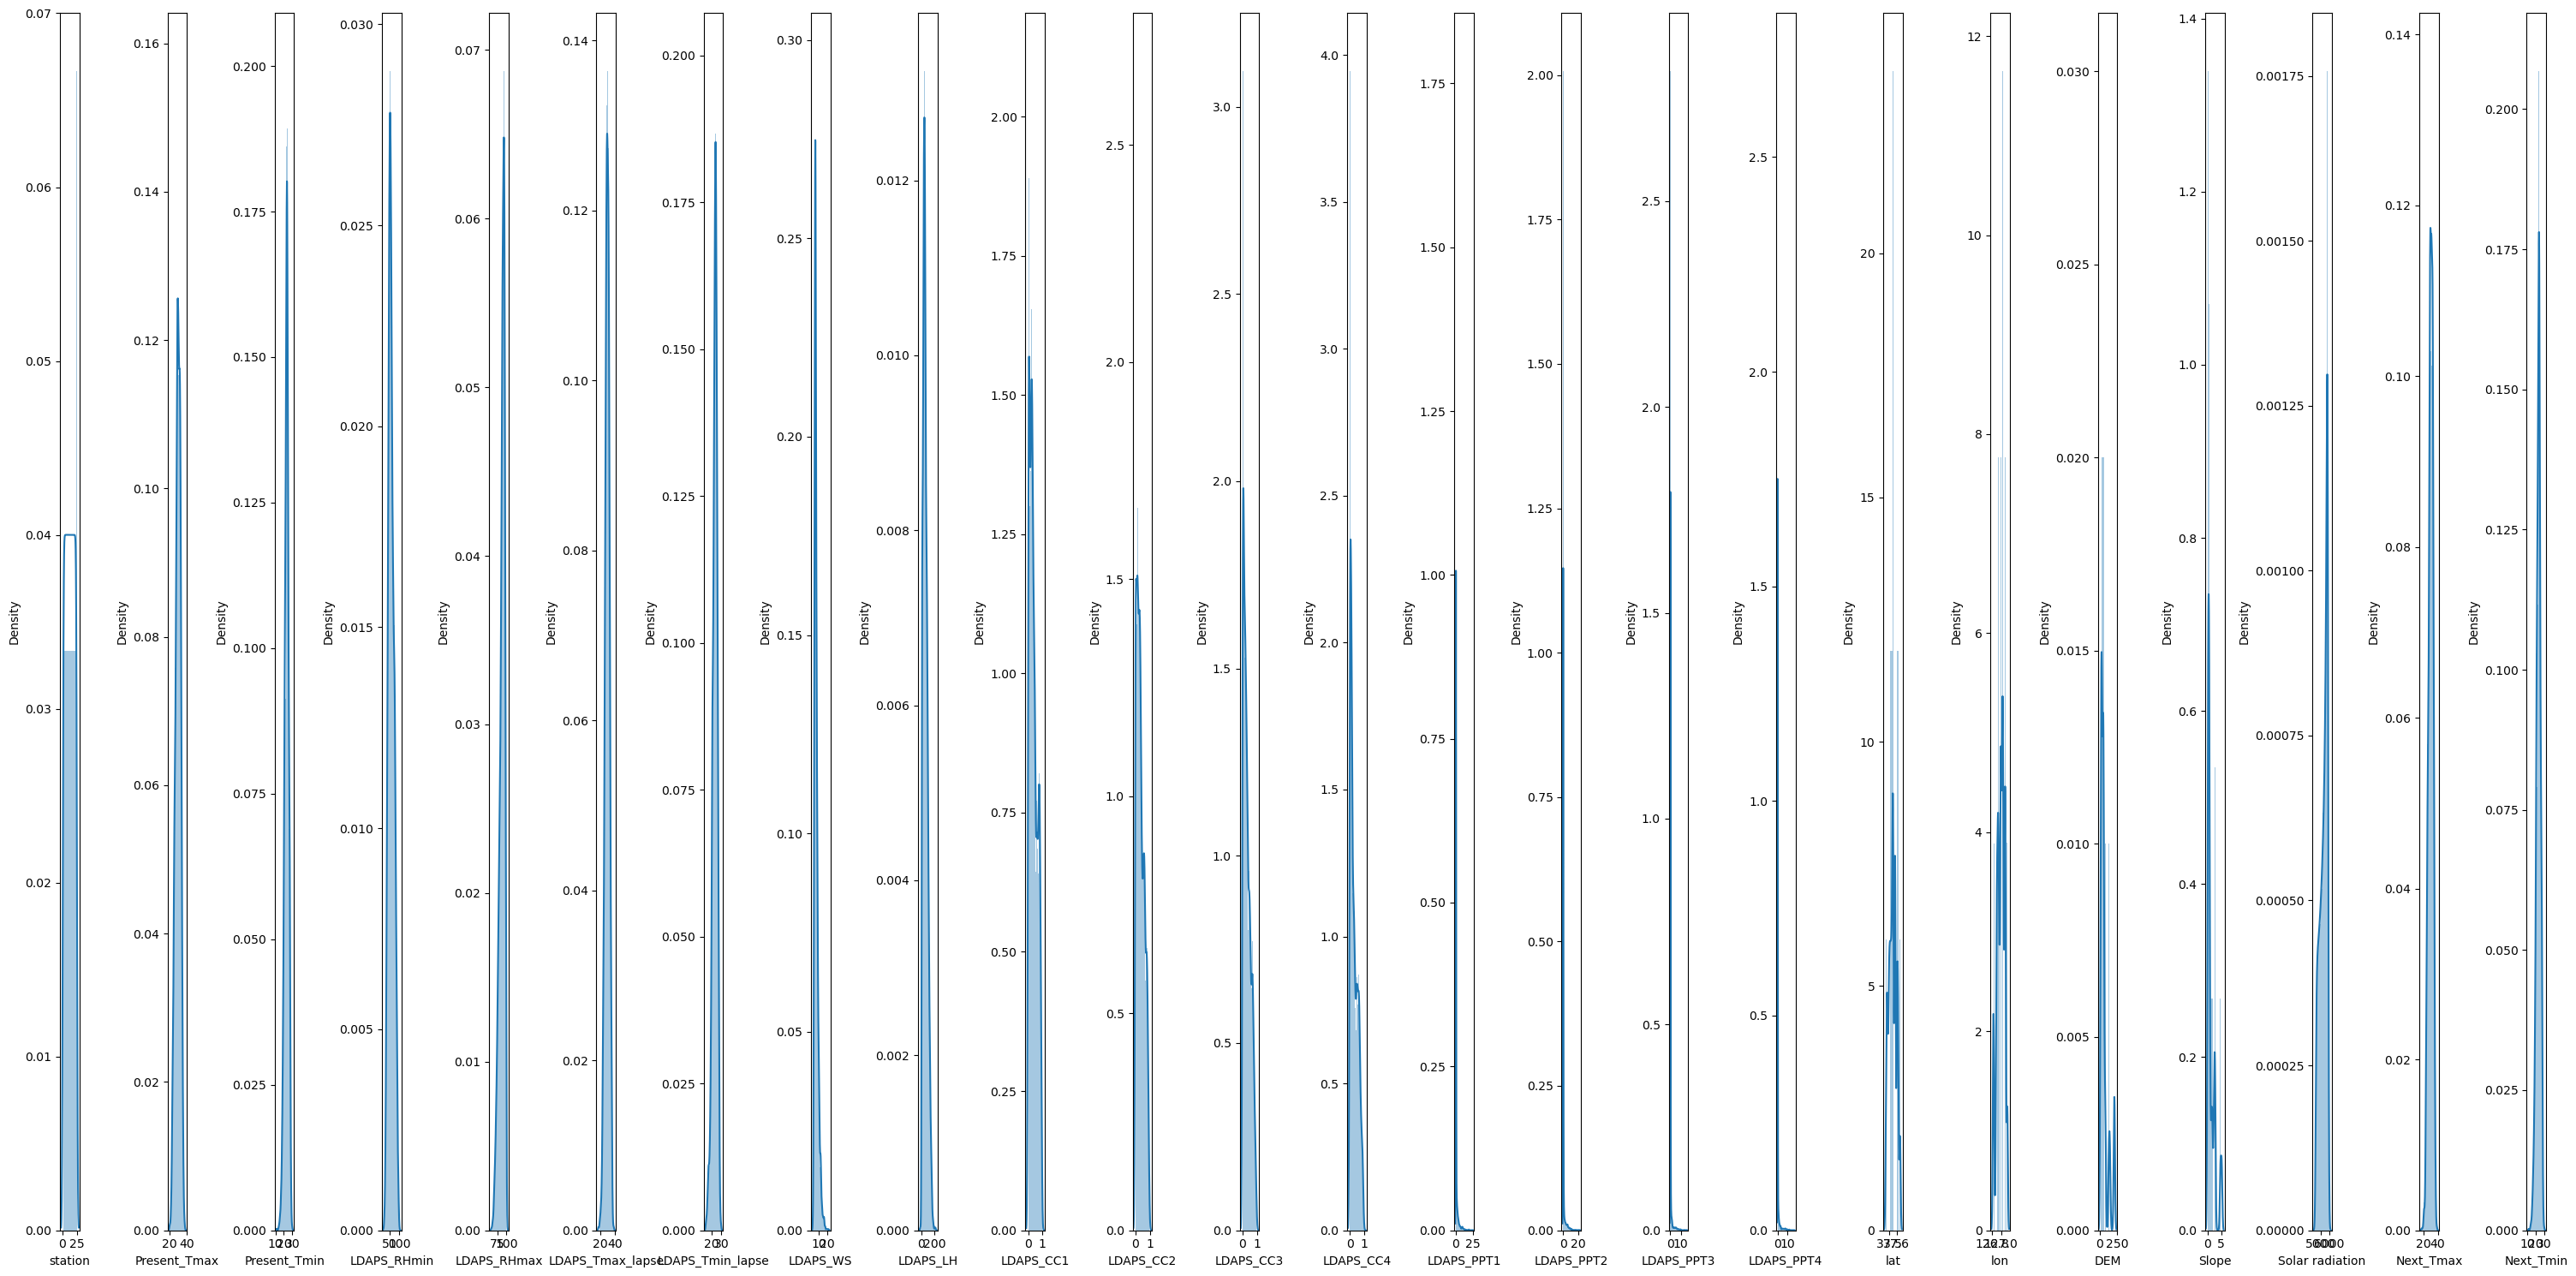

In [7]:
#PLOTING DISPLOT 

fig, axes = plt.subplots(ncols=len(tf_df.columns), figsize=(30,15))
for ax, col in zip(axes, tf_df.columns):
    sns.distplot(tf_df[col], ax=ax)
    plt.tight_layout() 
plt.show()

In [8]:
tf_df.fillna(tf_df.mean(),inplace=True)

In [9]:
tf_df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

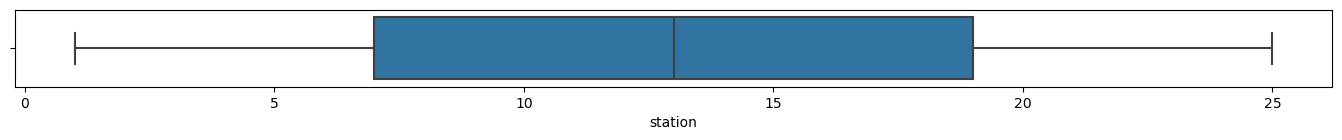

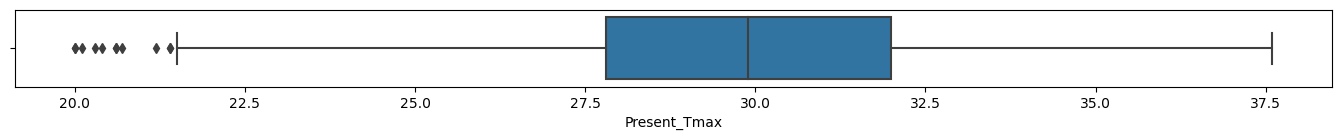

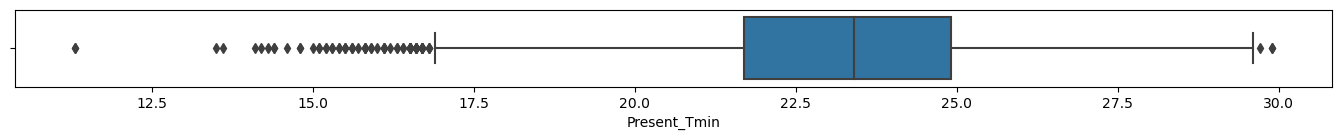

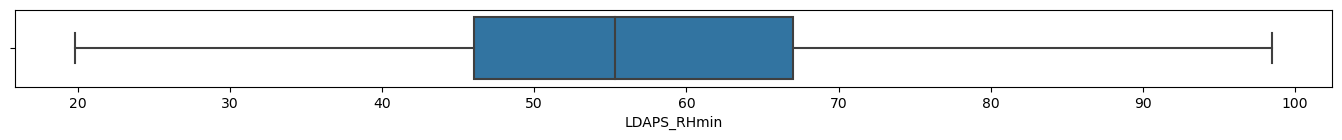

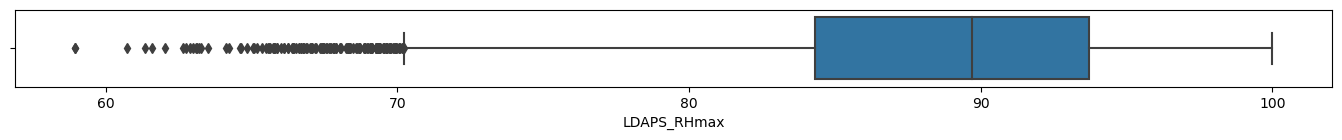

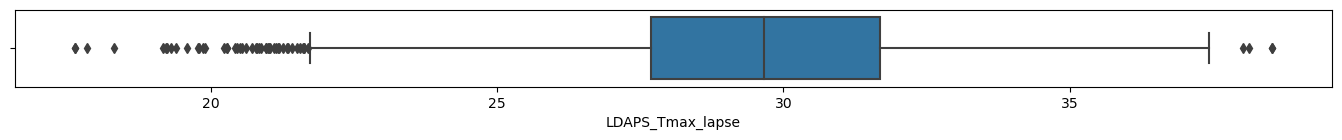

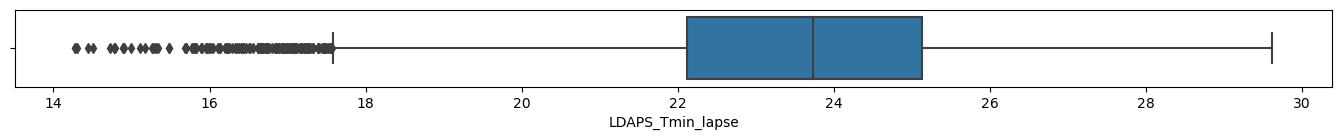

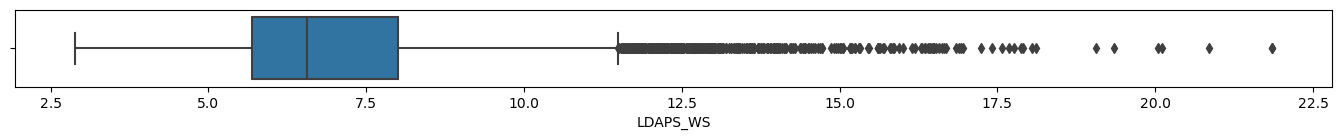

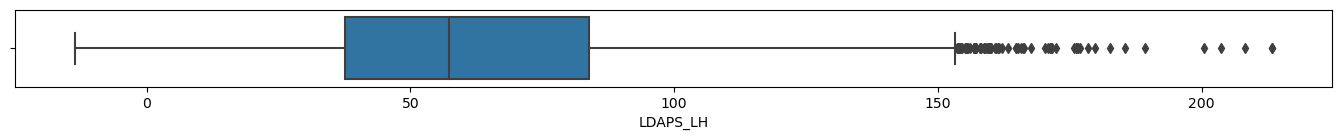

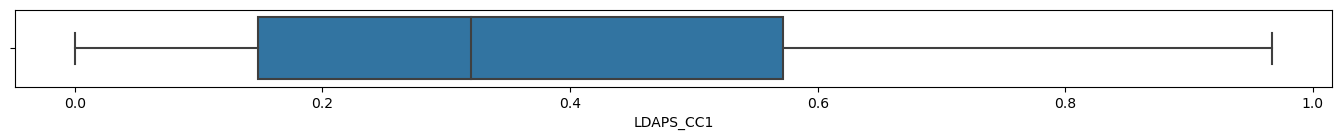

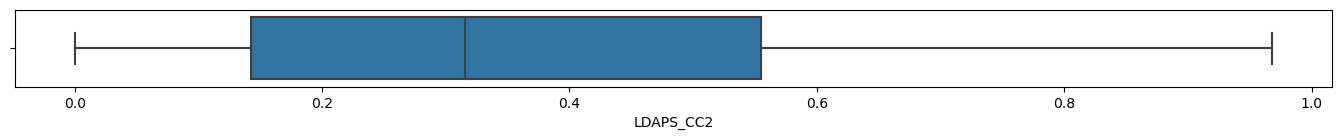

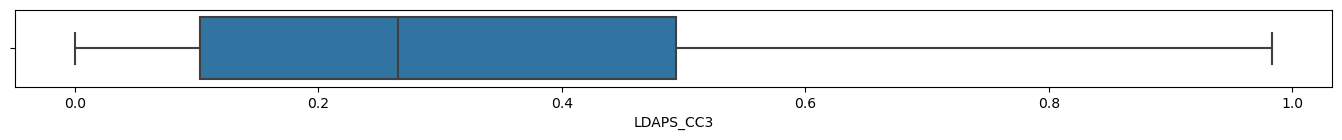

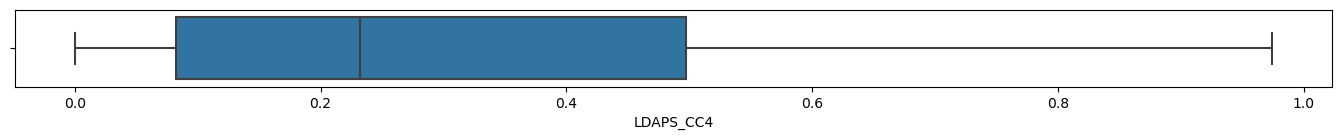

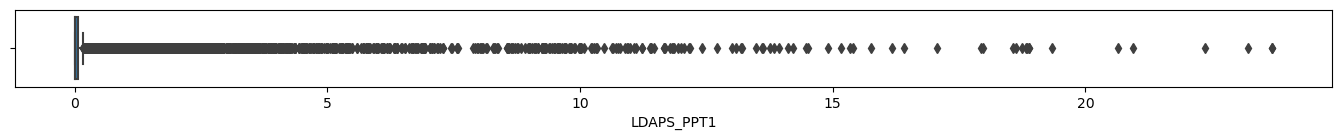

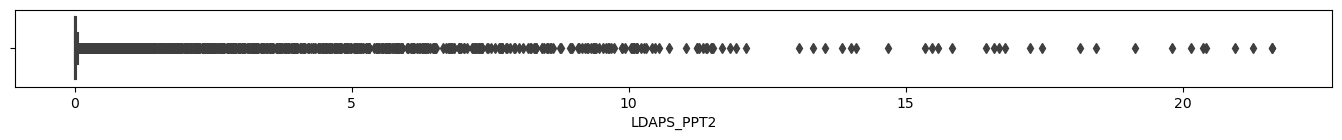

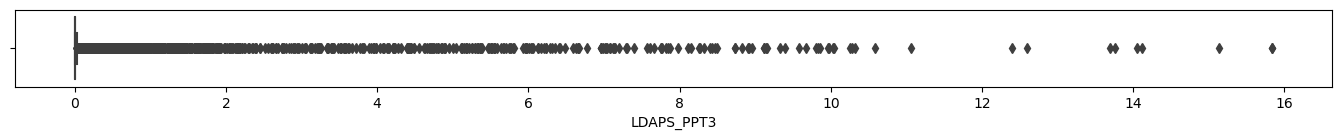

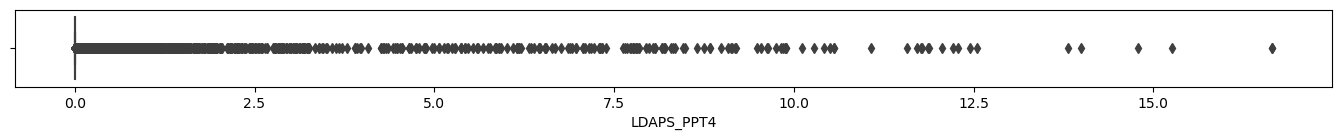

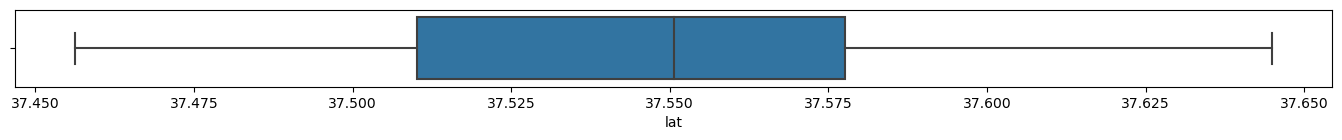

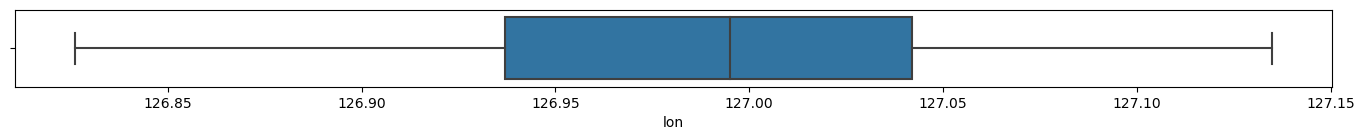

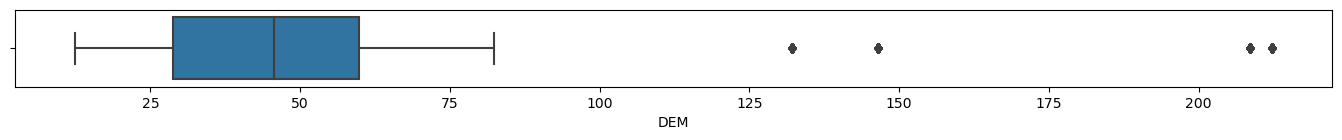

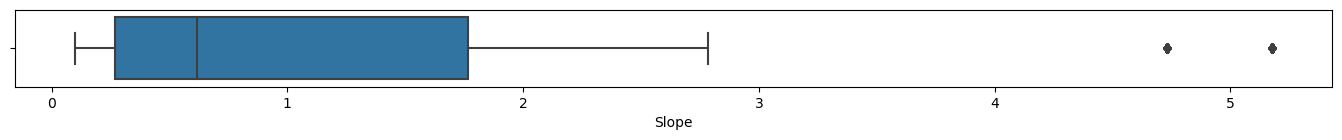

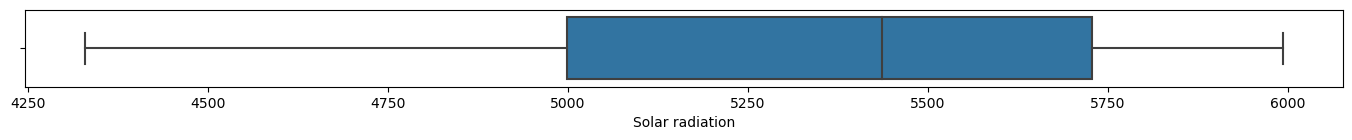

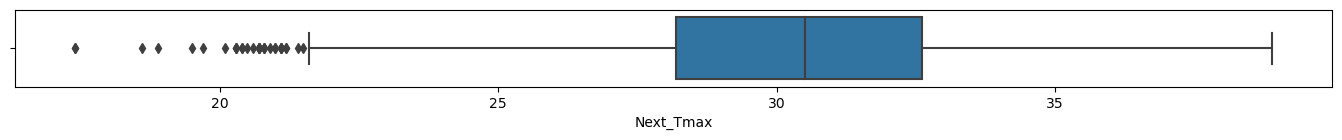

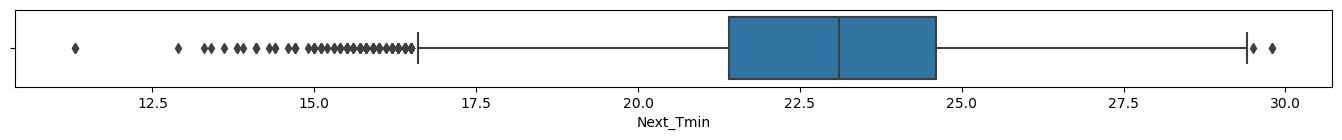

In [10]:
tf_df= tf_df.select_dtypes(exclude=['object'])
for column in tf_df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=tf_df, x=column)

<function matplotlib.pyplot.show(close=None, block=None)>

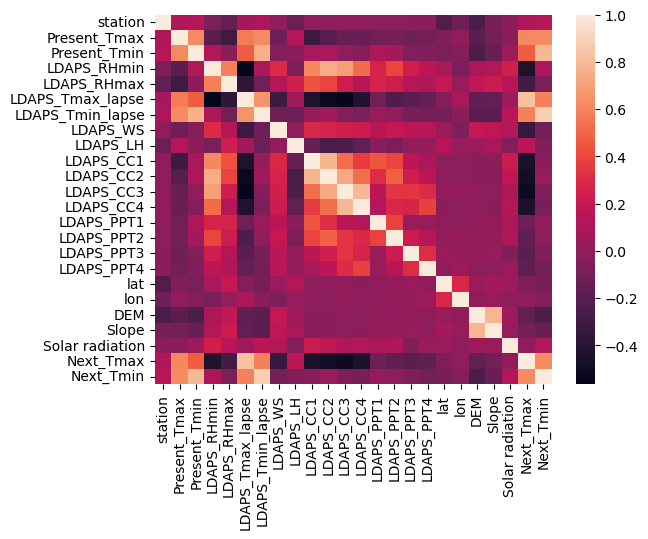

In [11]:
sns.heatmap(tf_df.corr())
plt.show

In [12]:
Q1=tf_df['Present_Tmax'].quantile(0.25)
Q2=tf_df['Present_Tmax'].quantile(0.5)
Q3=tf_df['Present_Tmax'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

21.5
38.3


In [13]:
tf_df['Present_Tmax'] = np.where(tf_df['Present_Tmax']> upplim,upplim,
                        np.where(tf_df['Present_Tmax']<lowlim,lowlim, tf_df['Present_Tmax']))

<AxesSubplot:xlabel='Present_Tmax'>

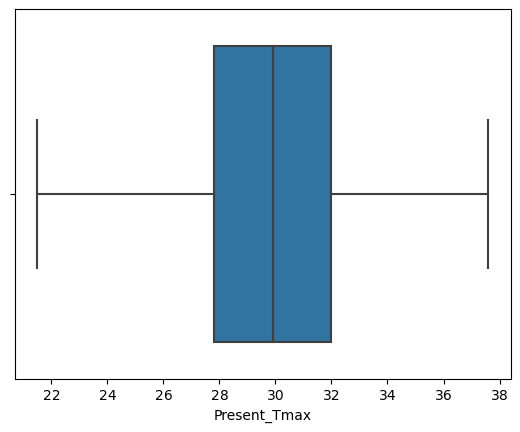

In [14]:
sns.boxplot('Present_Tmax',data=tf_df)

In [15]:
Q1=tf_df['Present_Tmin'].quantile(0.25)
Q2=tf_df['Present_Tmin'].quantile(0.5)
Q3=tf_df['Present_Tmin'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

16.9
29.699999999999996


In [16]:
tf_df['Present_Tmin'] = np.where(tf_df['Present_Tmin']> upplim,upplim,
                        np.where(tf_df['Present_Tmin']<lowlim,lowlim, tf_df['Present_Tmin']))

In [17]:
Q1=tf_df['LDAPS_RHmax'].quantile(0.25)
Q2=tf_df['LDAPS_RHmax'].quantile(0.5)
Q3=tf_df['LDAPS_RHmax'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)


70.23555755374998
107.78586578375003


In [18]:
tf_df['LDAPS_RHmax'] = np.where(tf_df['LDAPS_RHmax']> upplim,upplim,
                        np.where(tf_df['LDAPS_RHmax']<lowlim,lowlim, tf_df['LDAPS_RHmax']))


In [19]:
Q1=tf_df['LDAPS_Tmax_lapse'].quantile(0.25)
Q2=tf_df['LDAPS_Tmax_lapse'].quantile(0.5)
Q3=tf_df['LDAPS_Tmax_lapse'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)


21.707000612499996
37.6699093925


In [20]:
tf_df['LDAPS_Tmax_lapse'] = np.where(tf_df['LDAPS_Tmax_lapse']> upplim,upplim,
                        np.where(tf_df['LDAPS_Tmax_lapse']<lowlim,lowlim, tf_df['LDAPS_Tmax_lapse']))


In [21]:
Q1=tf_df['LDAPS_Tmin_lapse'].quantile(0.25)
Q2=tf_df['LDAPS_Tmin_lapse'].quantile(0.5)
Q3=tf_df['LDAPS_Tmin_lapse'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)


17.585628087499998
29.663023527500002


In [22]:
tf_df['LDAPS_Tmin_lapse'] = np.where(tf_df['LDAPS_Tmin_lapse']> upplim,upplim,
                        np.where(tf_df['LDAPS_Tmin_lapse']<lowlim,lowlim, tf_df['LDAPS_Tmin_lapse']))


In [23]:
Q1=tf_df['LDAPS_WS'].quantile(0.25)
Q2=tf_df['LDAPS_WS'].quantile(0.5)
Q3=tf_df['LDAPS_WS'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

2.205011355124999
11.488946982125


In [24]:
tf_df['LDAPS_WS'] = np.where(tf_df['LDAPS_WS']> upplim,upplim,
                        np.where(tf_df['LDAPS_WS']<lowlim,lowlim, tf_df['LDAPS_WS']))


In [25]:
Q1=tf_df['LDAPS_LH'].quantile(0.25)
Q2=tf_df['LDAPS_LH'].quantile(0.5)
Q3=tf_df['LDAPS_LH'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

-32.024967957499996
153.4623182625


In [26]:
tf_df['LDAPS_LH'] = np.where(tf_df['LDAPS_LH']> upplim,upplim,
                        np.where(tf_df['LDAPS_LH']<lowlim,lowlim, tf_df['LDAPS_LH']))


In [27]:
Q1=tf_df['DEM'].quantile(0.25)
Q2=tf_df['DEM'].quantile(0.5)
Q3=tf_df['DEM'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

-17.9986
106.531


In [28]:
tf_df['DEM'] = np.where(tf_df['DEM']> upplim,upplim,
                        np.where(tf_df['DEM']<lowlim,lowlim, tf_df['DEM']))


In [29]:
Q1=tf_df['Slope'].quantile(0.25)
Q2=tf_df['Slope'].quantile(0.5)
Q3=tf_df['Slope'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

-1.9734500000000001
4.01255


In [30]:
tf_df['Slope'] = np.where(tf_df['Slope']> upplim,upplim,
                        np.where(tf_df['Slope']<lowlim,lowlim, tf_df['Slope']))


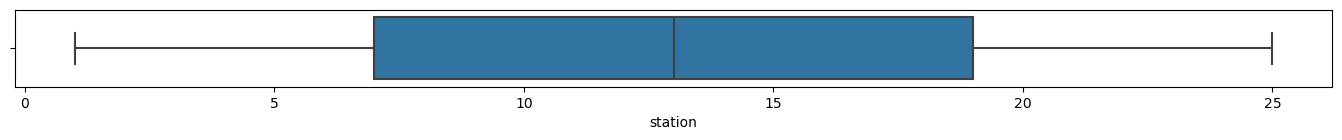

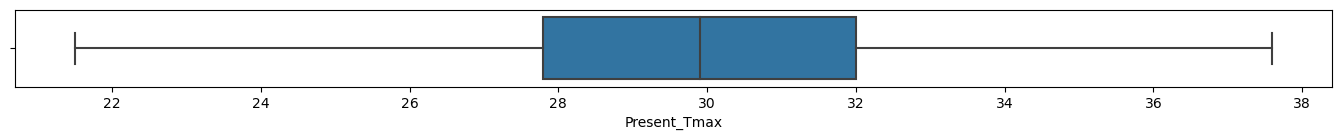

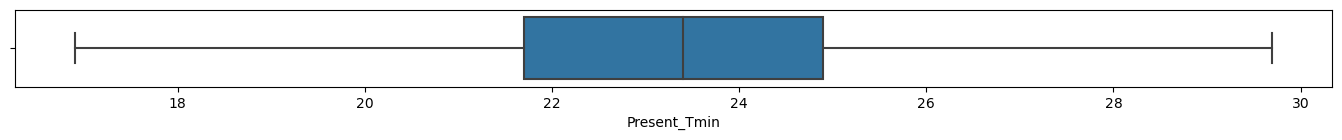

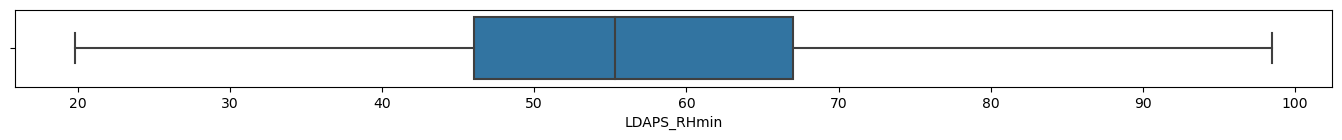

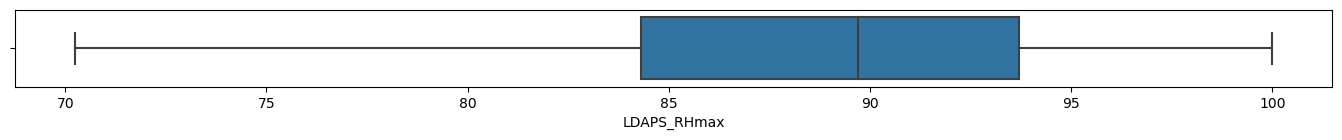

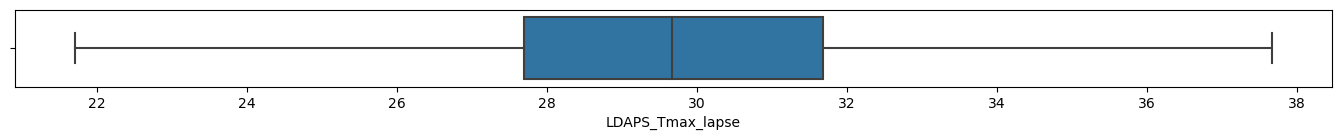

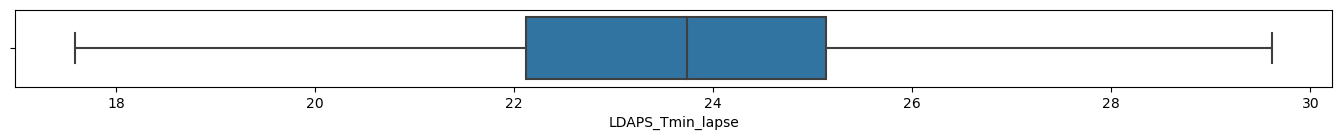

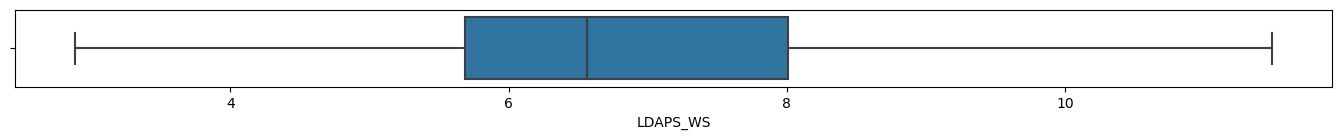

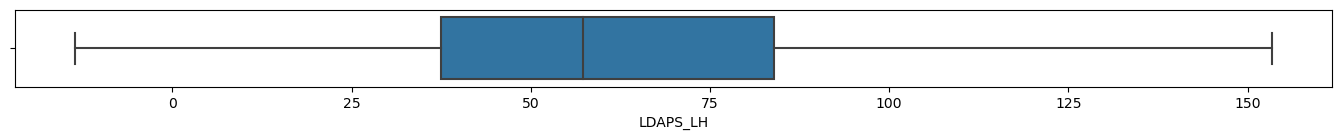

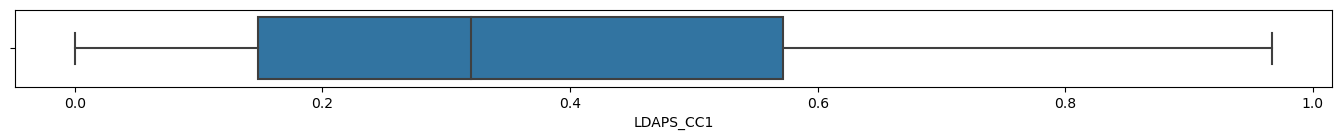

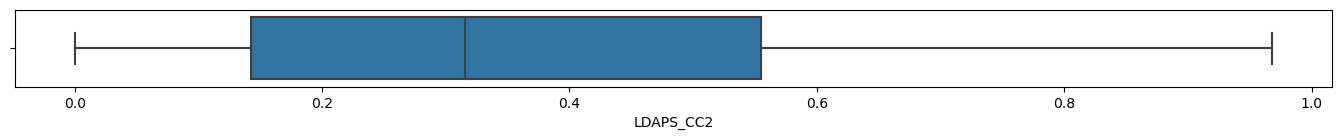

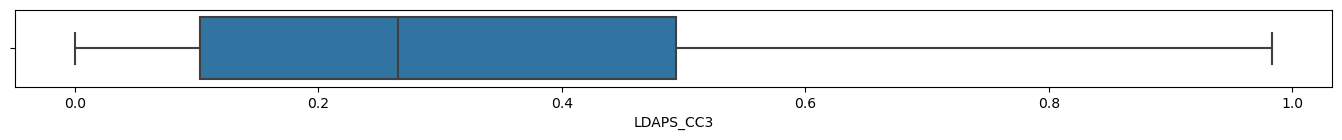

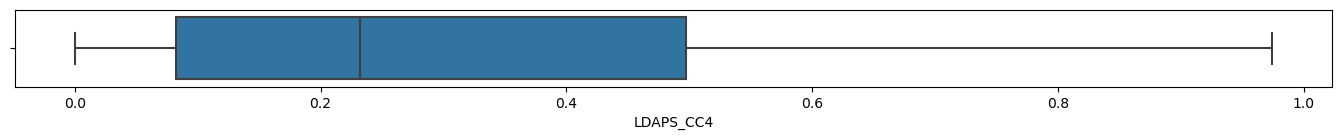

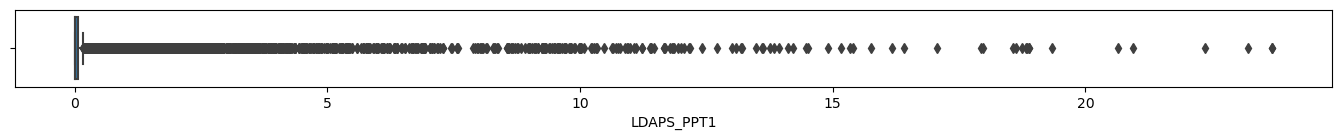

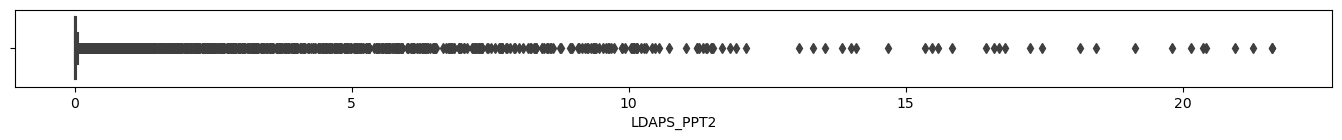

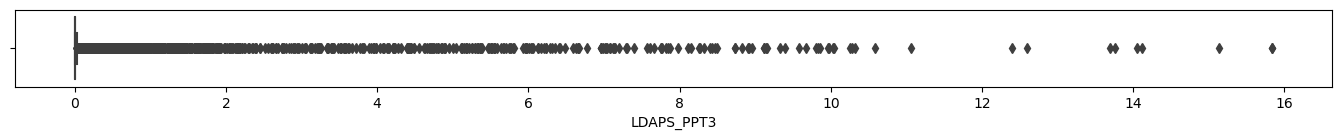

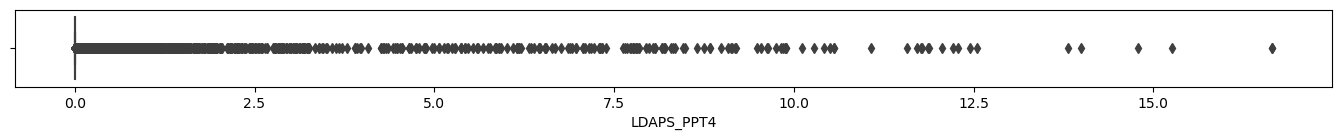

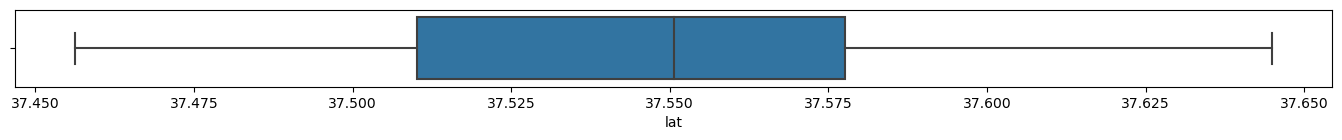

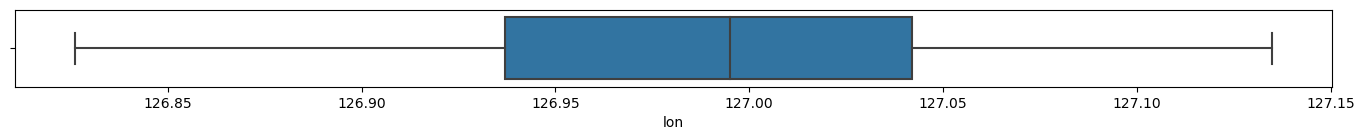

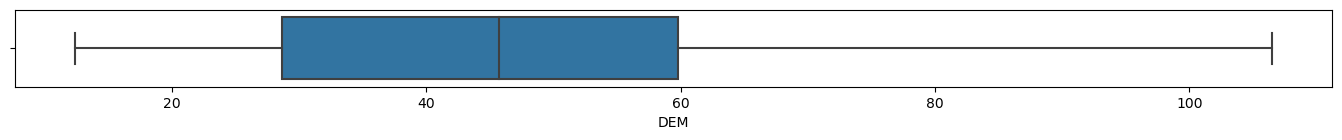

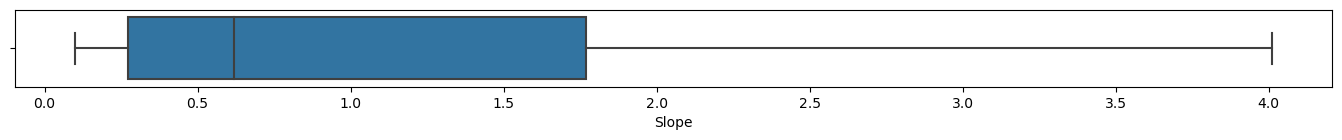

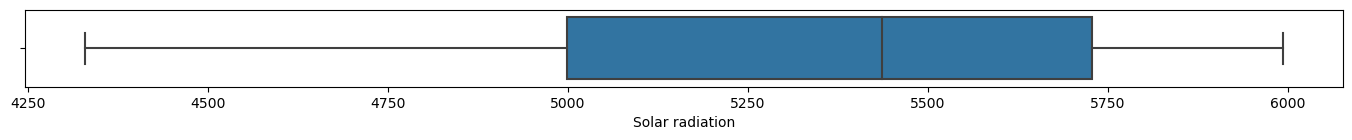

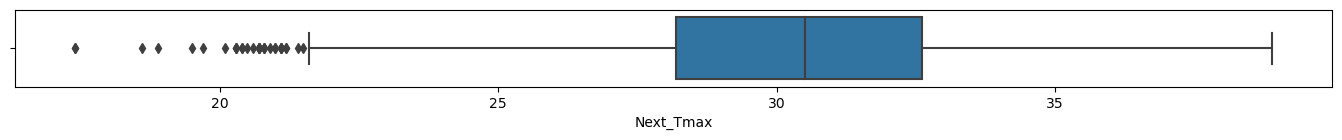

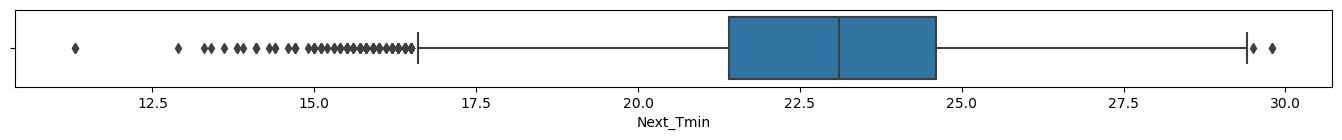

In [31]:
tf_df= tf_df.select_dtypes(exclude=['object'])
for column in tf_df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=tf_df, x=column)

In [32]:
Q1=tf_df['LDAPS_PPT1'].quantile(0.25)
Q2=tf_df['LDAPS_PPT1'].quantile(0.5)
Q3=tf_df['LDAPS_PPT1'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

-0.101389001625
0.168981669375


In [33]:
tf_df['LDAPS_PPT1'] = np.where(tf_df['LDAPS_PPT1']> upplim,upplim,
                        np.where(tf_df['LDAPS_PPT1']<lowlim,lowlim, tf_df['LDAPS_PPT1']))


<AxesSubplot:xlabel='LDAPS_PPT1'>

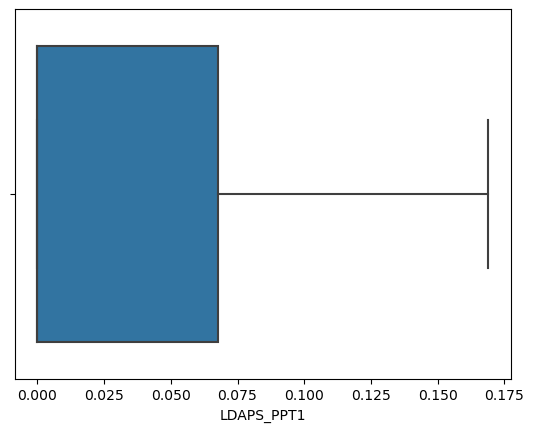

In [34]:
sns.boxplot('LDAPS_PPT1',data=tf_df)

In [35]:
Q1=tf_df['LDAPS_PPT2'].quantile(0.25)
Q2=tf_df['LDAPS_PPT2'].quantile(0.5)
Q3=tf_df['LDAPS_PPT2'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

-0.03641419725
0.06069032875


In [36]:
tf_df['LDAPS_PPT2'] = np.where(tf_df['LDAPS_PPT2']> upplim,upplim,
                        np.where(tf_df['LDAPS_PPT2']<lowlim,lowlim, tf_df['LDAPS_PPT2']))


<AxesSubplot:xlabel='LDAPS_PPT2'>

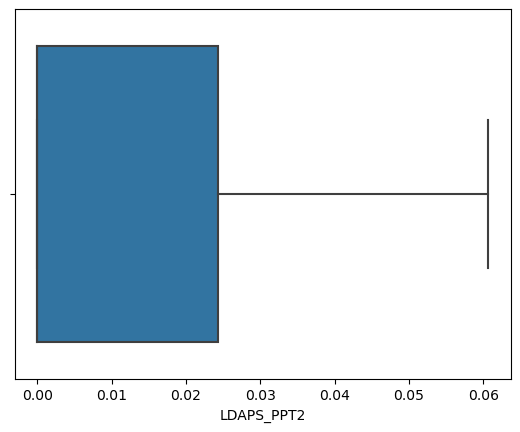

In [37]:
sns.boxplot('LDAPS_PPT2',data=tf_df)

In [38]:
Q1=tf_df['LDAPS_PPT3'].quantile(0.25)
Q2=tf_df['LDAPS_PPT3'].quantile(0.5)
Q3=tf_df['LDAPS_PPT3'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

-0.01454571975
0.02424286625


In [39]:
tf_df['LDAPS_PPT3'] = np.where(tf_df['LDAPS_PPT3']> upplim,upplim,
                        np.where(tf_df['LDAPS_PPT3']<lowlim,lowlim, tf_df['LDAPS_PPT3']))


In [40]:
Q1=tf_df['LDAPS_PPT4'].quantile(0.25)
Q2=tf_df['LDAPS_PPT4'].quantile(0.5)
Q3=tf_df['LDAPS_PPT4'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

-0.001039766625
0.001732944375


In [41]:
tf_df['LDAPS_PPT4'] = np.where(tf_df['LDAPS_PPT4']> upplim,upplim,
                        np.where(tf_df['LDAPS_PPT4']<lowlim,lowlim, tf_df['LDAPS_PPT4']))


<AxesSubplot:xlabel='LDAPS_PPT3'>

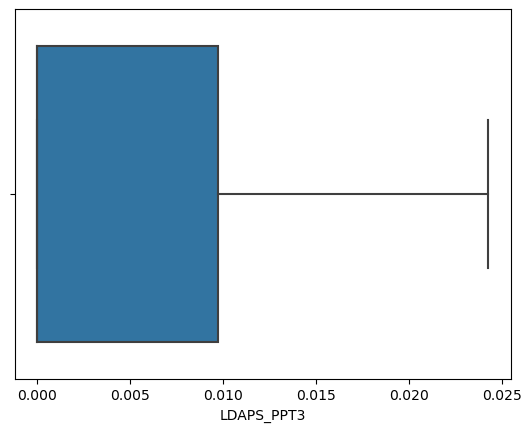

In [42]:
sns.boxplot('LDAPS_PPT3',data=tf_df)

<AxesSubplot:xlabel='LDAPS_PPT4'>

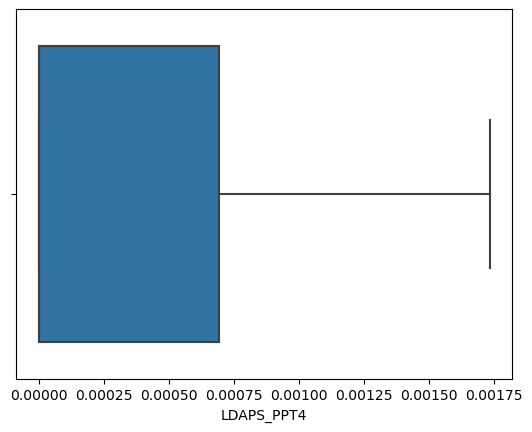

In [43]:
sns.boxplot('LDAPS_PPT4',data=tf_df)

In [44]:
Q1=tf_df['Next_Tmax'].quantile(0.25)
Q2=tf_df['Next_Tmax'].quantile(0.5)
Q3=tf_df['Next_Tmax'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

21.599999999999994
39.2


In [45]:
tf_df['Next_Tmax'] = np.where(tf_df['Next_Tmax']> upplim,upplim,
                        np.where(tf_df['Next_Tmax']<lowlim,lowlim, tf_df['Next_Tmax']))


In [46]:
Q1=tf_df['Next_Tmin'].quantile(0.25)
Q2=tf_df['Next_Tmin'].quantile(0.5)
Q3=tf_df['Next_Tmin'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

16.599999999999994
29.400000000000006


In [47]:
tf_df['Next_Tmin'] = np.where(tf_df['Next_Tmin']> upplim,upplim,
                        np.where(tf_df['Next_Tmin']<lowlim,lowlim, tf_df['Next_Tmin']))


<AxesSubplot:xlabel='Next_Tmin'>

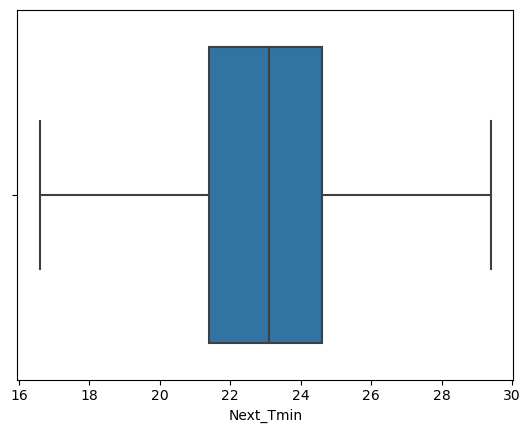

In [48]:
sns.boxplot('Next_Tmin',data=tf_df)

<AxesSubplot:xlabel='Next_Tmax'>

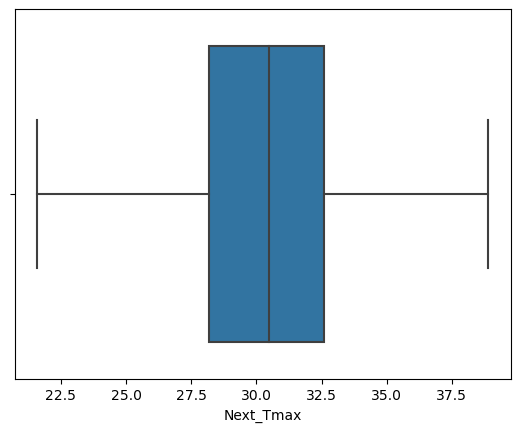

In [49]:
sns.boxplot('Next_Tmax',data=tf_df)

# Prediction for Next_Tmin

In [50]:
features = tf_df.drop(columns = ['Next_Tmin'],axis=1)
label= tf_df['Next_Tmin']
X = features
Y=label

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 0)

In [52]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

In [54]:
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [55]:
y_pred_1= knn.predict(X_test)



In [56]:
print("Training Accuracy : {}%".format(knn.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(knn.score(X_test, Y_test) * 100))

Training Accuracy : 92.04247637359681%
Testing Accuracy  : 87.28699835408634%


In [60]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
y_pred_2=dtr.predict(X_test)

In [61]:
print("Training Accuracy : {}%".format(dtr.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(dtr.score(X_test, Y_test) * 100))

Training Accuracy : 100.0%
Testing Accuracy  : 78.45603804627898%


In [62]:
rdr = RandomForestRegressor()
rdr.fit(X_train,Y_train)
y_pred_3=rdr.predict(X_test)

In [63]:
print("Training Accuracy : {}%".format(rdr.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(rdr.score(X_test, Y_test) * 100))

Training Accuracy : 98.77531499511286%
Testing Accuracy  : 90.40010771732275%


In [64]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
y_pred_4=lr.predict(X_test)

In [65]:
print("Training Accuracy : {}%".format(lr.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(lr.score(X_test, Y_test) * 100))

Training Accuracy : 84.9527609348043%
Testing Accuracy  : 84.55869697532603%


# tuning of the model (knn)

In [79]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,30,5))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsRegressor()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,Y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 14


In [82]:
# Create a new KNN classifier with the best hyperparameters
best_knn = KNeighborsRegressor(leaf_size=1, p=1, n_neighbors=14)

# Fit the model on the training data
best_knn.fit(X_train, Y_train)

# Make predictions on the test data
y_pred_5 = best_knn.predict(X_test)

# Calculate the accuracy of the model

print("Training Accuracy : {}%".format(knn.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(knn.score(X_test, Y_test) * 100))

Training Accuracy : 90.46743243193755%
Testing Accuracy  : 85.30202882357732%


# FINDINGS 

WE CAN CHECK THE LINEAR REGRESSION MODEL IS PERFORMING THE BEST AS IT IS GIVING THE HIGHEST ACCURACY OF 84%


# Prediction for Next_Tmax

In [83]:
features = tf_df.drop(columns = ['Next_Tmax'],axis=1)
label= tf_df['Next_Tmax']
X = features
Y=label

In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 10)

In [111]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_val)

In [112]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

In [113]:
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [115]:
y_pred= knn.predict(X_test)


In [117]:
print("Training Accuracy : {}%".format(knn.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(knn.score(X_test, Y_test) * 100))

Training Accuracy : 90.2235993727717%
Testing Accuracy  : 85.94146433385517%


In [90]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
y_pred_1=dtr.predict(X_test)

In [91]:
print("Training Accuracy : {}%".format(dtr.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(dtr.score(X_test, Y_test) * 100))

Training Accuracy : 100.0%
Testing Accuracy  : 76.03135609151508%


In [92]:
rdr = RandomForestRegressor()
rdr.fit(X_train,Y_train)
y_pred_2=rdr.predict(X_test)

In [93]:
print("Training Accuracy : {}%".format(rdr.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(rdr.score(X_test, Y_test) * 100))

Training Accuracy : 98.62418674603212%
Testing Accuracy  : 90.02131981959765%


In [94]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)

In [95]:
print("Training Accuracy : {}%".format(lr.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(lr.score(X_test, Y_test) * 100))

Training Accuracy : 78.7176136689892%
Testing Accuracy  : 79.34591801091754%


In [97]:
leaf_size = list(range(1,15,5))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsRegressor()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,Y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 14


In [118]:
# Create a new KNN classifier with the best hyperparameters
best_knn = KNeighborsRegressor(leaf_size=1, p=1, n_neighbors=14)

# Fit the model on the training data
best_knn.fit(X_train, Y_train)

# Make predictions on the test data
y_pred_5 = best_knn.predict(X_test)

# Calculate the accuracy of the model

print("Training Accuracy : {}%".format(knn.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(knn.score(X_test, Y_test) * 100))

Training Accuracy : 90.2235993727717%
Testing Accuracy  : 85.94146433385517%


# findings

WE CAN CHECK THE LINEAR REGRESSION MODEL IS PERFORMING THE BEST AS IT IS GIVING THE HIGHEST ACCURACY OF 79%


In [120]:
import joblib

filename = 'best_logistic_regression.joblib'
joblib.dump(lr, filename)
print(f"Model saved to {filename}")


Model saved to best_logistic_regression.joblib


In [121]:
# Load the model from the file
filename = 'best_logistic_regression.joblib'
loaded_model = joblib.load(filename)